In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

robo_symbol = 'VTI'
human_symbol = 'AGTHX'

robo_data = yf.download(robo_symbol, start="2015-01-01", end="2024-01-01")
human_data = yf.download(human_symbol, start="2015-01-01", end="2024-01-01")

print(robo_data.head())
print(human_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                      Adj Close       Close        High         Low  \
Ticker                           VTI         VTI         VTI         VTI   
Date                                                                       
2015-01-02 00:00:00+00:00  89.454857  105.919998  106.720001  105.269997   
2015-01-05 00:00:00+00:00  87.917778  104.099998  105.550003  103.860001   
2015-01-06 00:00:00+00:00  87.056351  103.080002  104.500000  102.510002   
2015-01-07 00:00:00+00:00  88.095154  104.309998  104.449997  103.550003   
2015-01-08 00:00:00+00:00  89.649132  106.150002  106.239998  105.110001   

Price                            Open   Volume  
Ticker                            VTI      VTI  
Date                                            
2015-01-02 00:00:00+00:00  106.489998  5298300  
2015-01-05 00:00:00+00:00  105.349998  5383500  
2015-01-06 00:00:00+00:00  104.400002  4226100  
2015-01-07 00:00:00+00:00  104.089996  3661500  
2015-01-08 00:00:00+00:00  105.209999  2796200  

[*********************100%***********************]  1 of 1 completed


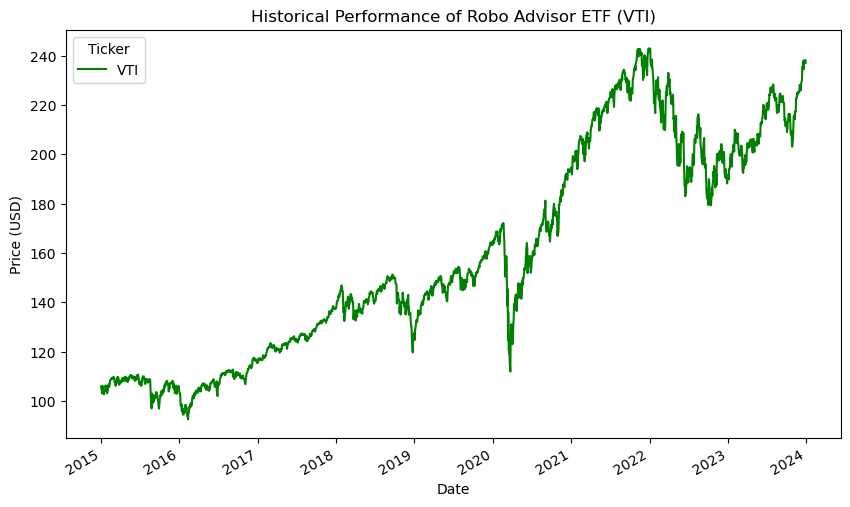

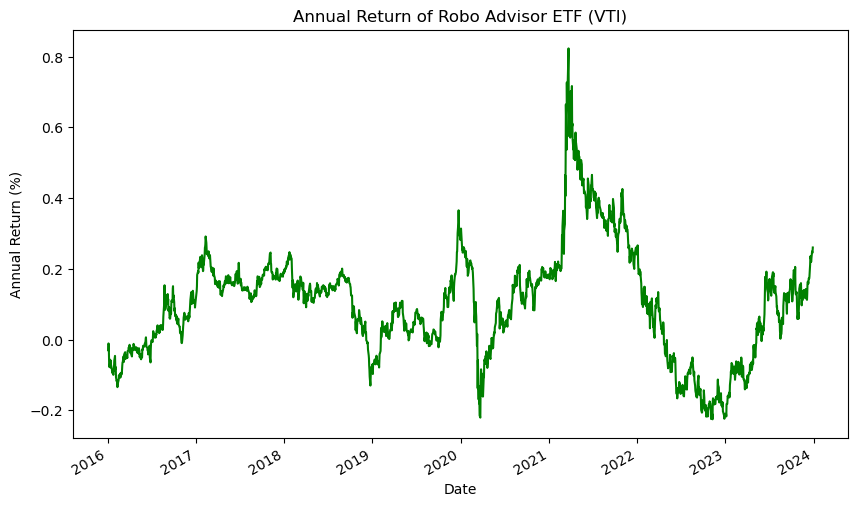

In [1]:
#Robo historical performance & annual returns
import yfinance as yf
import matplotlib.pyplot as plt

etf_symbol = 'VTI'
etf_data = yf.download(etf_symbol, start="2015-01-01", end="2024-01-01")

etf_data['Close'].plot(title="Historical Performance of Robo Advisor ETF (VTI)", figsize=(10,6), color='green')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

etf_data['Annual Return'] = etf_data['Close'].pct_change(periods=252)  # 252 trading days in a year
etf_data['Annual Return'].plot(title="Annual Return of Robo Advisor ETF (VTI)", figsize=(10,6), color='green')
plt.ylabel("Annual Return (%)")
plt.show()

[*********************100%***********************]  1 of 1 completed


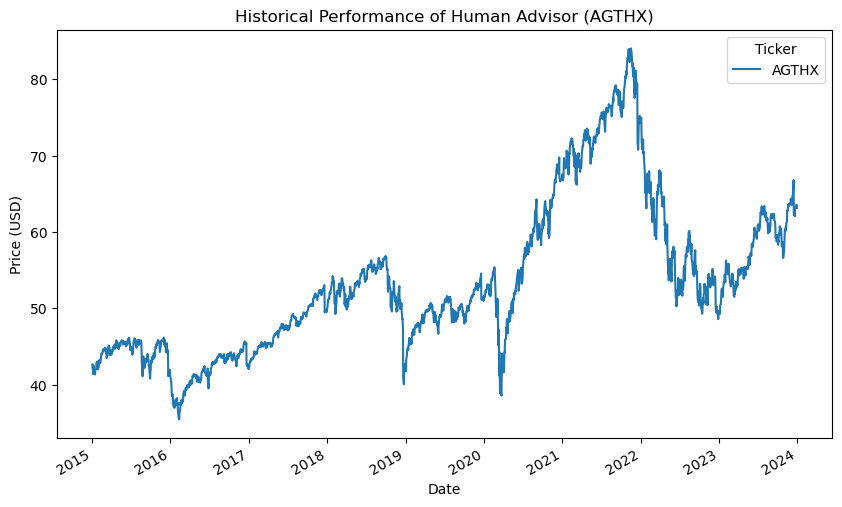

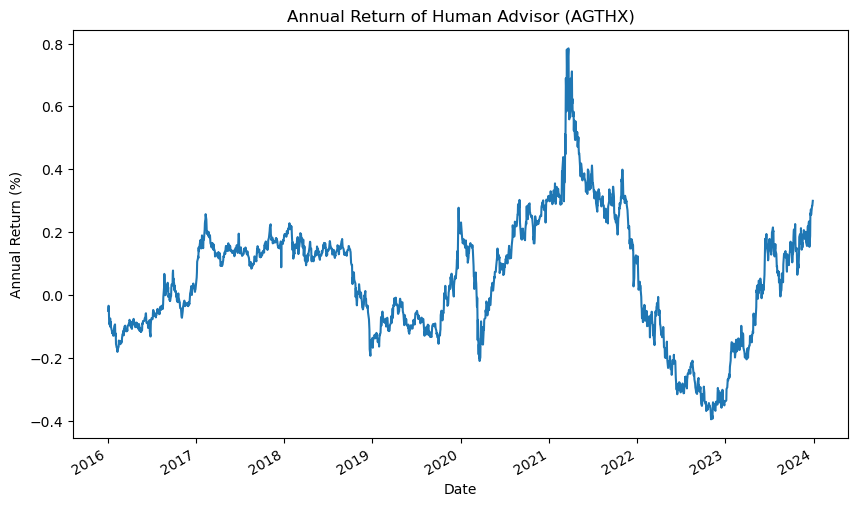

In [3]:
#Human advisor historical performance & annual returns
import yfinance as yf
import matplotlib.pyplot as plt

etf_symbol = 'AGTHX'
etf_data = yf.download(etf_symbol, start="2015-01-01", end="2024-01-01")

etf_data['Close'].plot(title="Historical Performance of Human Advisor (AGTHX)", figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

etf_data['Annual Return'] = etf_data['Close'].pct_change(periods=252)
etf_data['Annual Return'].plot(title="Annual Return of Human Advisor (AGTHX)", figsize=(10,6))
plt.ylabel("Annual Return (%)")
plt.show()

In [3]:
#Regression
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

vti_data = yf.download('VTI', start="2015-01-01", end="2024-01-01")
agthx_data = yf.download('AGTHX', start="2015-01-01", end="2024-01-01")

#Compute daily returns
vti_data['Daily_Return'] = vti_data['Close'].pct_change()
agthx_data['Daily_Return'] = agthx_data['Close'].pct_change()

combined_data = pd.DataFrame({
    'VTI_Return': vti_data['Daily_Return'],
    'AGTHX_Return': agthx_data['Daily_Return']
}).dropna()

#Categorical variable for Robo (1) & Human (0)
combined_data['Type'] = [1 if i < len(combined_data) / 2 else 0 for i in range(len(combined_data))]

#Calculate the rolling volatility(standard deviation of returns)
combined_data['VTI_Volatility'] = combined_data['VTI_Return'].rolling(window=30).std()
combined_data['AGTHX_Volatility'] = combined_data['AGTHX_Return'].rolling(window=30).std()

combined_data['Avg_Volatility'] = (combined_data['VTI_Volatility'] + combined_data['AGTHX_Volatility']) / 2
combined_data = combined_data.dropna()

y = combined_data['VTI_Return'] #Dependent Variable
X = combined_data[['Type', 'Avg_Volatility']]  #Independent variables

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:             VTI_Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5598
Date:                Thu, 12 Dec 2024   Prob (F-statistic):              0.571
Time:                        11:57:17   Log-Likelihood:                 6774.2
No. Observations:                2234   AIC:                        -1.354e+04
Df Residuals:                    2231   BIC:                        -1.353e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -5.51e-05      0.001     -0.

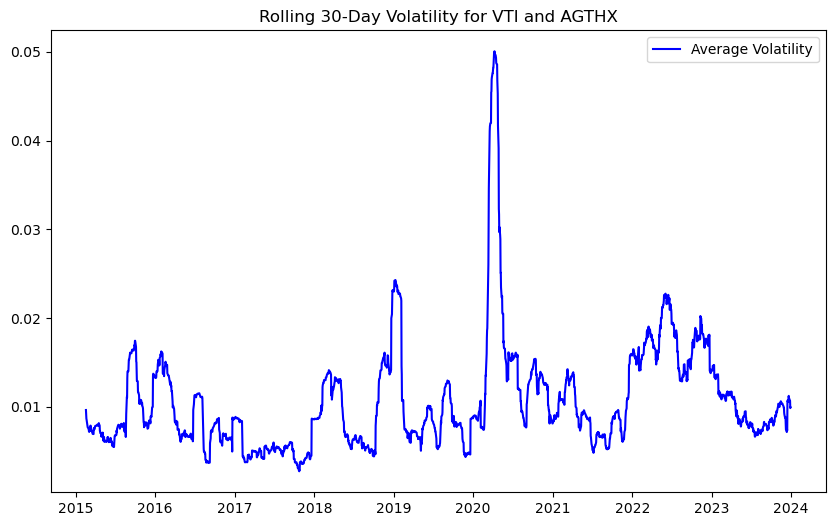

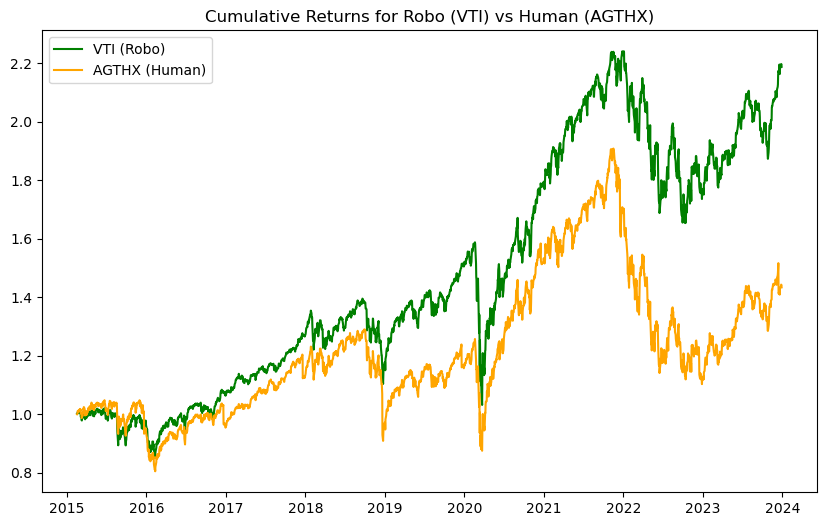

In [32]:
#Visualization
#Plot the rolling volatility
plt.figure(figsize=(10, 6))
plt.plot(combined_data['Avg_Volatility'], label='Average Volatility', color='blue')
plt.title("Rolling 30-Day Volatility for VTI and AGTHX")
plt.legend()
plt.show()

#Plot the cumulative returns
combined_data['Cumulative_VTI'] = (1 + combined_data['VTI_Return']).cumprod()
combined_data['Cumulative_AGTHX'] = (1 + combined_data['AGTHX_Return']).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Cumulative_VTI'], label='VTI (Robo)', color='green')
plt.plot(combined_data.index, combined_data['Cumulative_AGTHX'], label='AGTHX (Human)', color='orange')
plt.title("Cumulative Returns for Robo (VTI) vs Human (AGTHX)")
plt.legend()
plt.show()

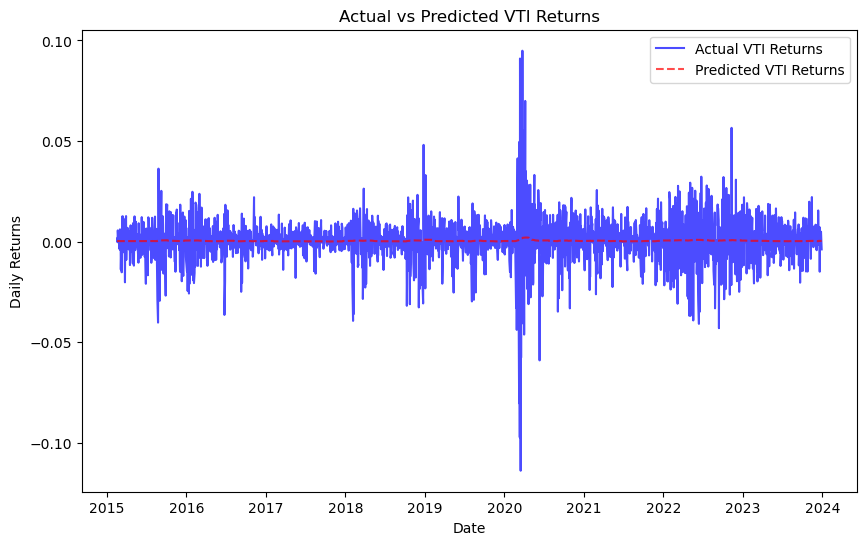

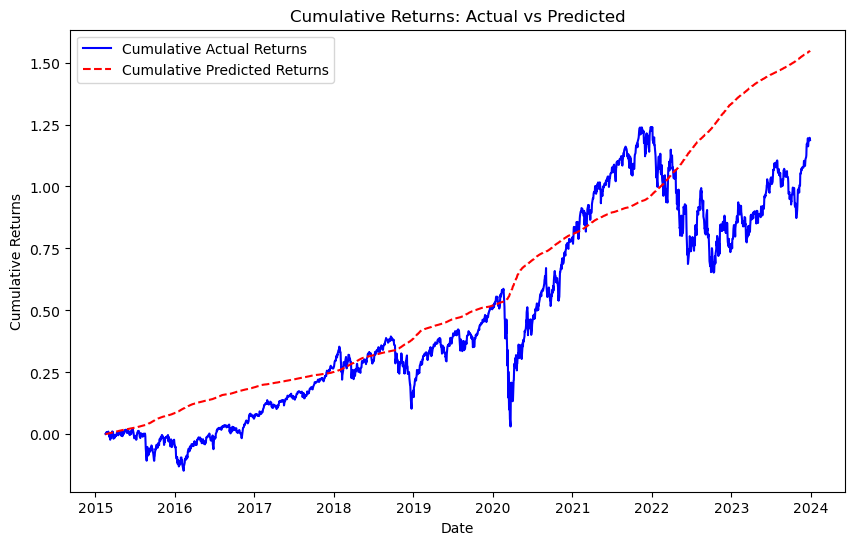

In [4]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Predict returns based on the regression model
combined_data['Predicted_VTI_Return'] = model.predict(X)

#Plot actual vs predicted returns for VTI
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['VTI_Return'], label='Actual VTI Returns', color='blue', alpha=0.7)
plt.plot(combined_data.index, combined_data['Predicted_VTI_Return'], label='Predicted VTI Returns', color='red', linestyle='--', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted VTI Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

#Backtest: Calculate cumulative returns
combined_data['Cumulative_Return'] = (1 + combined_data['VTI_Return']).cumprod() - 1
combined_data['Cumulative_Predicted_Return'] = (1 + combined_data['Predicted_VTI_Return']).cumprod() - 1

#Plot cumulative returns for both actual and predicted returns
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Cumulative_Return'], label='Cumulative Actual Returns', color='blue')
plt.plot(combined_data.index, combined_data['Cumulative_Predicted_Return'], label='Cumulative Predicted Returns', color='red', linestyle='--')
plt.legend()
plt.title('Cumulative Returns: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T-statistic: [0.14486038]
P-value: [0.8895647]
There is no statistically significant difference between Robo and Human Advisor YTD performance.


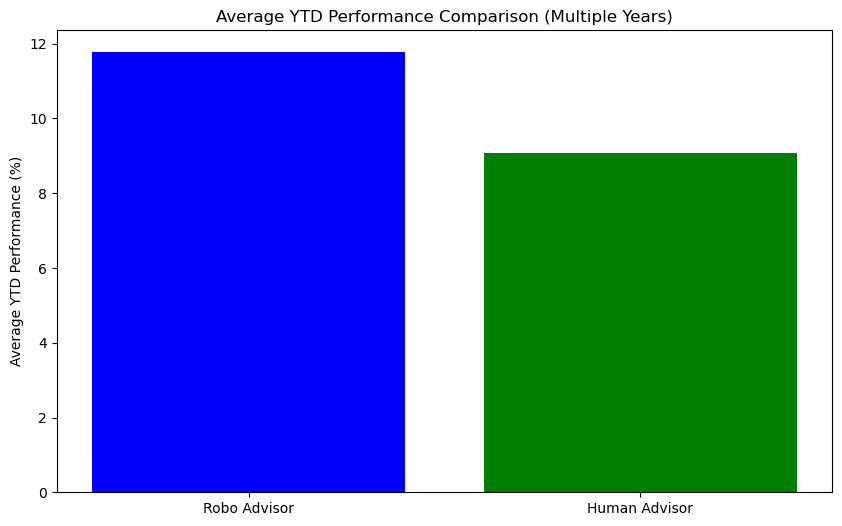

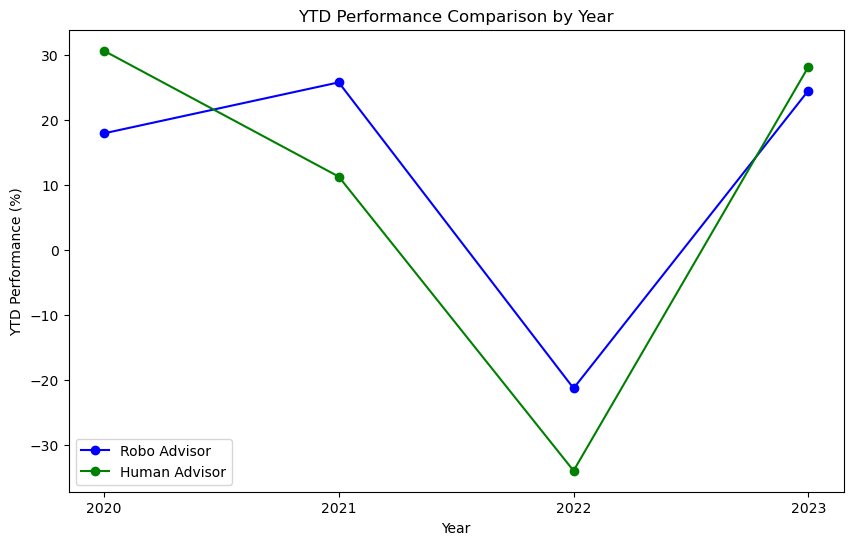

In [37]:
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

robo_symbol = 'VTI'
human_symbol = 'AGTHX'

robo_data = yf.download(robo_symbol, start="2020-01-01", end="2024-01-01")
human_data = yf.download(human_symbol, start="2020-01-01", end="2024-01-01")

def calculate_ytd_performance(data):
    ytd_performance = []
    years = data.index.year.unique()
    for year in years:
        start_of_year = data[data.index.year == year].iloc[0]
        end_of_year = data[data.index.year == year].iloc[-1]
        ytd_performance.append((end_of_year['Close'] - start_of_year['Close']) / start_of_year['Close'] * 100)
    return ytd_performance

robo_ytd = calculate_ytd_performance(robo_data)
human_ytd = calculate_ytd_performance(human_data)

t_stat, p_value = stats.ttest_ind(robo_ytd, human_ytd)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between Robo and Human Advisor YTD performance.")
else:
    print("There is no statistically significant difference between Robo and Human Advisor YTD performance.")

#Plot the YTD Performance for both
plt.figure(figsize=(10, 6))
plt.bar(['Robo Advisor', 'Human Advisor'], [np.mean(robo_ytd), np.mean(human_ytd)], color=['blue', 'green'])
plt.title('Average YTD Performance Comparison (Multiple Years)')
plt.ylabel('Average YTD Performance (%)')
plt.show()

#Plot YTD Performance for each year
plt.figure(figsize=(10, 6))
plt.plot(robo_ytd, label='Robo Advisor', color='blue', marker='o')
plt.plot(human_ytd, label='Human Advisor', color='green', marker='o')

years = robo_data.index.year.unique()
plt.xticks(ticks=range(len(years)), labels=years)

plt.title('YTD Performance Comparison by Year')
plt.ylabel('YTD Performance (%)')
plt.xlabel('Year')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Robo Advisor Sharpe Ratio: 0.48975
Human Advisor Sharpe Ratio: 0.48909


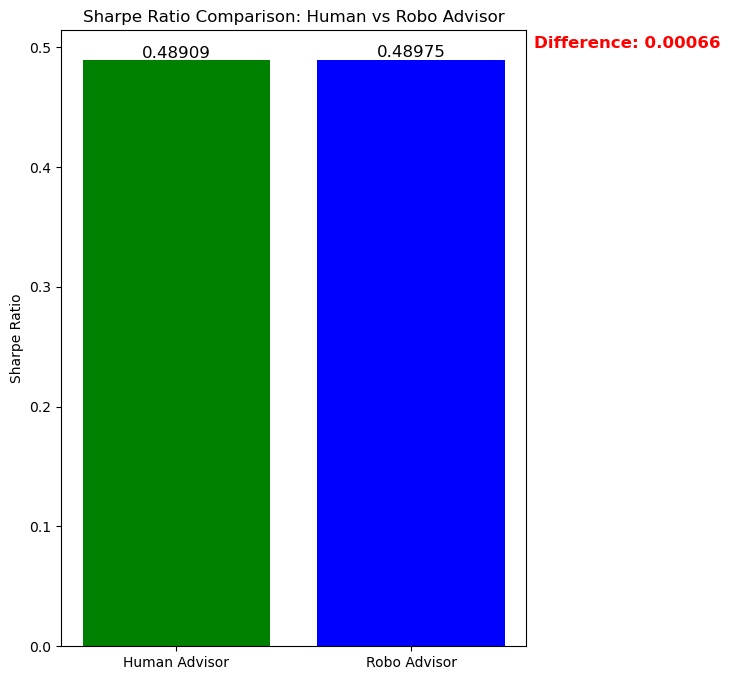

In [84]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

robo_symbol = 'VTI'
human_symbol = 'AGTHX'

robo_data = yf.download(robo_symbol, start="2020-01-01", end="2024-01-01")
human_data = yf.download(human_symbol, start="2020-01-01", end="2024-01-01")

robo_returns = robo_data['Adj Close'].pct_change().dropna()
human_returns = human_data['Adj Close'].pct_change().dropna()

risk_free_rate = 0.02 / 252

def calculate_sharpe_ratio(returns, risk_free_rate):
    mean_return = returns.mean()
    std_deviation = returns.std()
    sharpe_ratio = (mean_return - risk_free_rate) / std_deviation
    annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)
    return annualized_sharpe_ratio.item()

#Calculate the Sharpe ratio for both Robo and Human Advisors
robo_sharpe = calculate_sharpe_ratio(robo_returns, risk_free_rate)
human_sharpe = calculate_sharpe_ratio(human_returns, risk_free_rate)

print(f"Robo Advisor Sharpe Ratio: {robo_sharpe:.5f}")
print(f"Human Advisor Sharpe Ratio: {human_sharpe:.5f}")

plt.figure(figsize=(6, 8))

bar_positions = [0.25, 0.75]
bars = plt.bar(bar_positions, [human_sharpe, robo_sharpe], color=['green', 'blue'], width=0.4, align='center')

plt.text(0.25, human_sharpe + 0.002, f'{human_sharpe:.5f}', ha='center', fontsize=12, color='black')
plt.text(0.75, robo_sharpe + 0.002, f'{robo_sharpe:.5f}', ha='center', fontsize=12, color='black')

difference = abs(robo_sharpe - human_sharpe)

plt.text(1.21, max(human_sharpe, robo_sharpe) + 0.01, f'Difference: {difference:.5f}', 
         ha='center', fontsize=12, color='red', fontweight='bold')

plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio Comparison: Human vs Robo Advisor')

plt.xticks(bar_positions, ['Human Advisor', 'Robo Advisor'])

plt.show()